In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *

teacher_sal = "nj_teachers_salaries_2016 (1).csv"
teacher_sal = pd.read_csv(teacher_sal)

teacher_sal.head()

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
0,Heckman,William,Atlantic,Atlantic City,Pennsylvania Ave School,Mathematics Grades 5 - 8,1.0,98774,Standard certificate,General ed,Traditional,Not highly qualified,13.0,13.0,13.0
1,Bird,Kelly,Atlantic,Atlantic City,Atlantic City High School,Coordinator Substance Abuse,1.0,118415,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,16.0,16.0,16.0
2,Bean,David B,Atlantic,Atlantic City,Atlantic City High School,Health & Physical Education,0.8,98774,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,13.0,13.0,15.0
3,Campo,Paula Mia,Atlantic,Atlantic City,Atlantic City High School,Resource Program In-class,1.0,66184,Standard certificate,Special ed,Alternate,Doesn't need to be highly qualified,16.0,16.0,16.0
4,Adams-meyer,Della L,Atlantic,Atlantic City,Atlantic City High School,School Psychologist,1.0,101866,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,12.0,12.0,12.0


In [46]:
cleaned_teacher_sal =teacher_sal[[
    "district","salary","experience_district",
    ]].copy()
#To get the first part of the district name
cleaned_teacher_sal["district"] = cleaned_teacher_sal["district"].apply(lambda x: x.split()[0])

final_data=cleaned_teacher_sal[(cleaned_teacher_sal["district"].isin(["Princeton","Summit","Bridgeton","Clifton","Hoboken"]))] 
final_data =final_data.rename(columns={"district": "City"})
final_data =final_data.rename(columns={"experience_district": "Experience"})
final_data =final_data.rename(columns={"salary": "Salary"})
final_data.head()


,City,Salary,Experience
34429,Bridgeton,81740,8.0
34430,Bridgeton,51985,0.0
34431,Bridgeton,51260,1.0
34432,Bridgeton,55885,1.0
34532,Bridgeton,51260,1.0


In [47]:
final_data["City"]=final_data["City"].apply(lambda x: x.upper())
final_data.head()

,City,Salary,Experience
34429,BRIDGETON,81740,8.0
34430,BRIDGETON,51985,0.0
34431,BRIDGETON,51260,1.0
34432,BRIDGETON,55885,1.0
34532,BRIDGETON,51260,1.0


In [48]:
# File to Load (Remember to change these)
graduation_data = "graduation_data.csv"

# Read the City and Ride Data
graduation_data = pd.read_csv(graduation_data)


# Combine the data into a single dataset
combined_teachergrad_data = pd.merge(final_data,graduation_data,how='left',on='City')
combined_teachergrad_data.head()


,City,Salary,Experience,Unnamed: 0,GRAD_RATE,Population
0,BRIDGETON,81740,8.0,0,78.78,24817.0
1,BRIDGETON,51985,0.0,0,78.78,24817.0
2,BRIDGETON,51260,1.0,0,78.78,24817.0
3,BRIDGETON,55885,1.0,0,78.78,24817.0
4,BRIDGETON,51260,1.0,0,78.78,24817.0


In [49]:
#To get mean
final_data_mean = combined_teachergrad_data.groupby("City").mean()
#To sort
final_data_mean =final_data_mean.sort_values(by='City', ascending=False)
#Select and Rename the columns needed
final_data_mean=final_data_mean[["Salary","Experience","GRAD_RATE","Population"]].rename(columns={"GRAD_RATE":"Grad_Rate"})
final_data_mean.head()



,Salary,Experience,Grad_Rate,Population
City,,,,
SUMMIT,77876.483240,8.578212,96.09,22238.0
PRINCETON,81895.900208,9.866944,94.85,31415.0
HOBOKEN,79416.630824,8.555556,86.01,55044.0
CLIFTON,73404.275946,12.142857,83.79,86414.0
BRIDGETON,67511.417094,9.733333,78.78,24817.0


Text(0,0.5,'Graduation Rate')

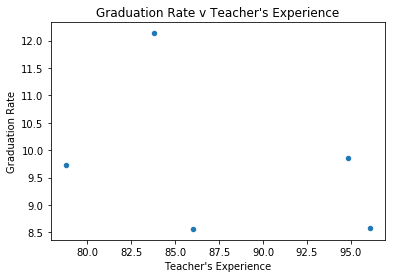

In [50]:
# Tell matplotlib to create a scatter plot based upon the above data
final_data_mean.plot.scatter(x="Grad_Rate", y="Experience")

# Create a title, x label, and y label for our chart
plt.title("Graduation Rate v Teacher's Experience")
plt.xlabel("Teacher's Experience")
plt.ylabel("Graduation Rate")



Text(0,0.5,'Graduation Rate')

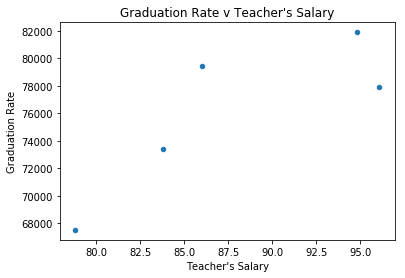

In [51]:
final_data_mean.plot.scatter(x="Grad_Rate", y="Salary")

# Create a title, x label, and y label for our chart
plt.title("Graduation Rate v Teacher's Salary")
plt.xlabel("Teacher's Salary")
plt.ylabel("Graduation Rate")



Text(0,0.5,"Teacher's Experience")

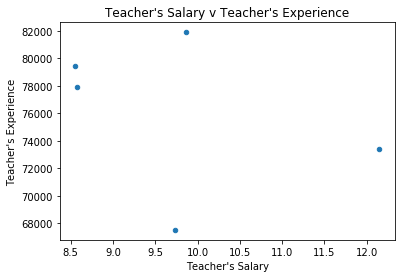

In [52]:
final_data_mean.plot.scatter(x="Experience", y="Salary")

# Create a title, x label, and y label for our chart
plt.title("Teacher's Salary v Teacher's Experience")
plt.xlabel("Teacher's Salary")
plt.ylabel("Teacher's Experience")

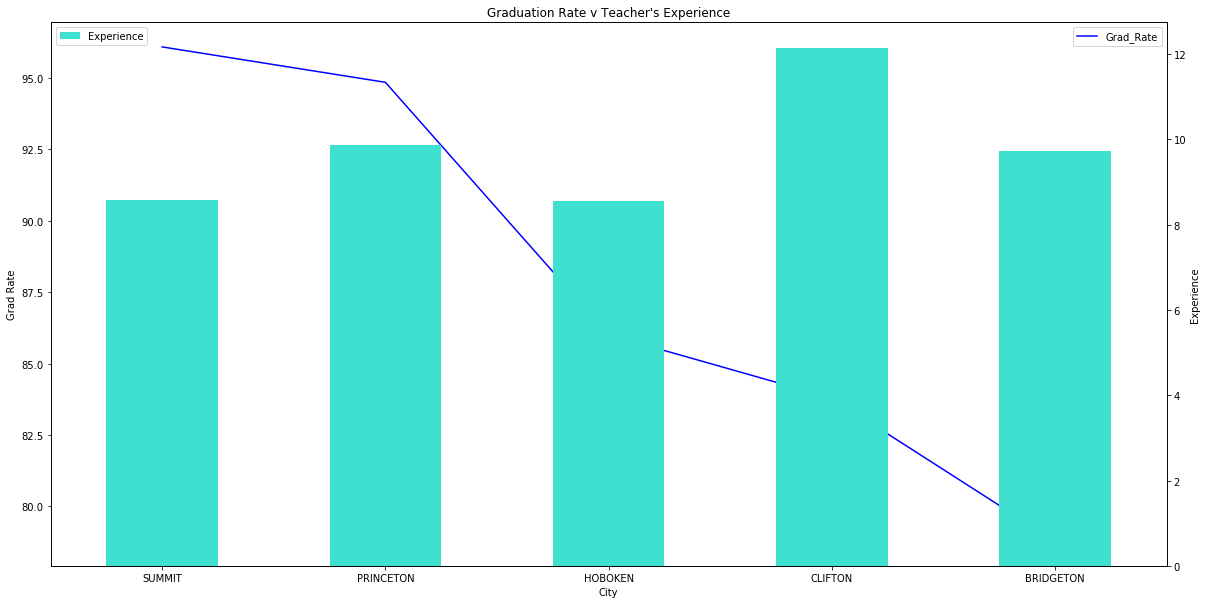

In [53]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)
ax.set_ylabel("Grad Rate")

ax2 = ax.twinx()
ax2.set_ylabel("Experience")

final_data_mean.Grad_Rate.plot(kind="line", ax=ax, color='Blue', legend=True)
final_data_mean.Experience.plot(kind="bar", ax=ax2,color='Turquoise', legend=True)
ax.set_title("Graduation Rate v Teacher's Experience")
plt.legend(loc="upper left")
#plt.savefig("../graph/gradrate_teachexp_2axis.png")

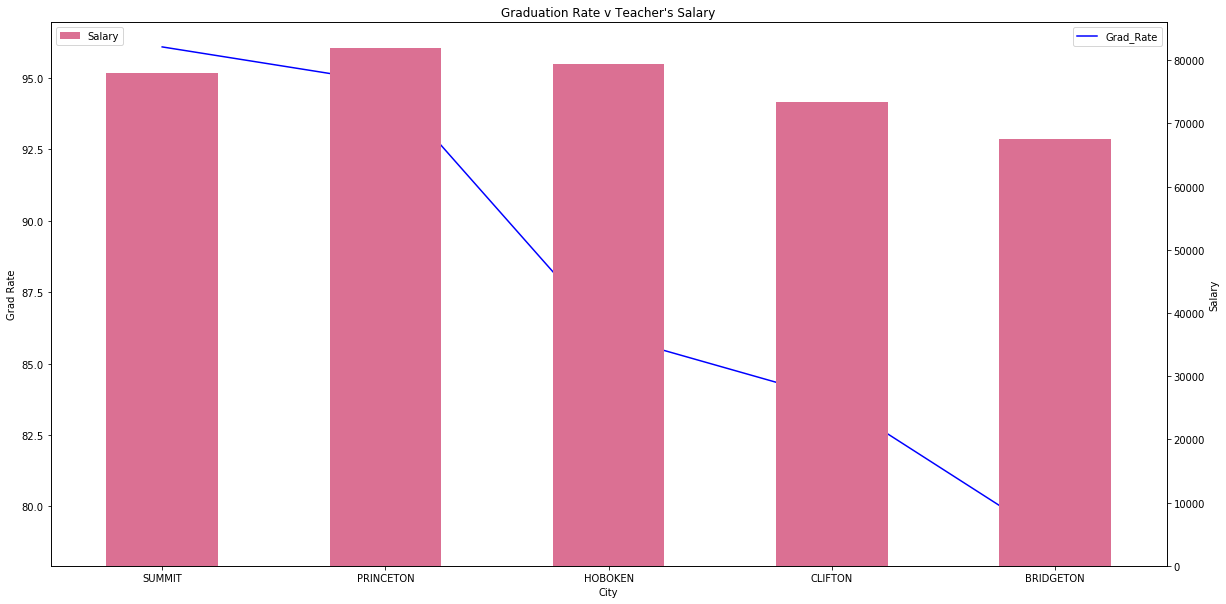

In [54]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)
ax.set_ylabel("Grad Rate")

ax2 = ax.twinx()
ax2.set_ylabel("Salary")

final_data_mean.Grad_Rate.plot(kind="line", ax=ax, color='Blue', legend=True)
final_data_mean.Salary.plot(kind="bar", ax=ax2,color='Palevioletred', legend=True)
ax.set_title("Graduation Rate v Teacher's Salary")
plt.legend(loc="upper left")
#plt.savefig("../graph/gradrate_teachexp_2axis.png")

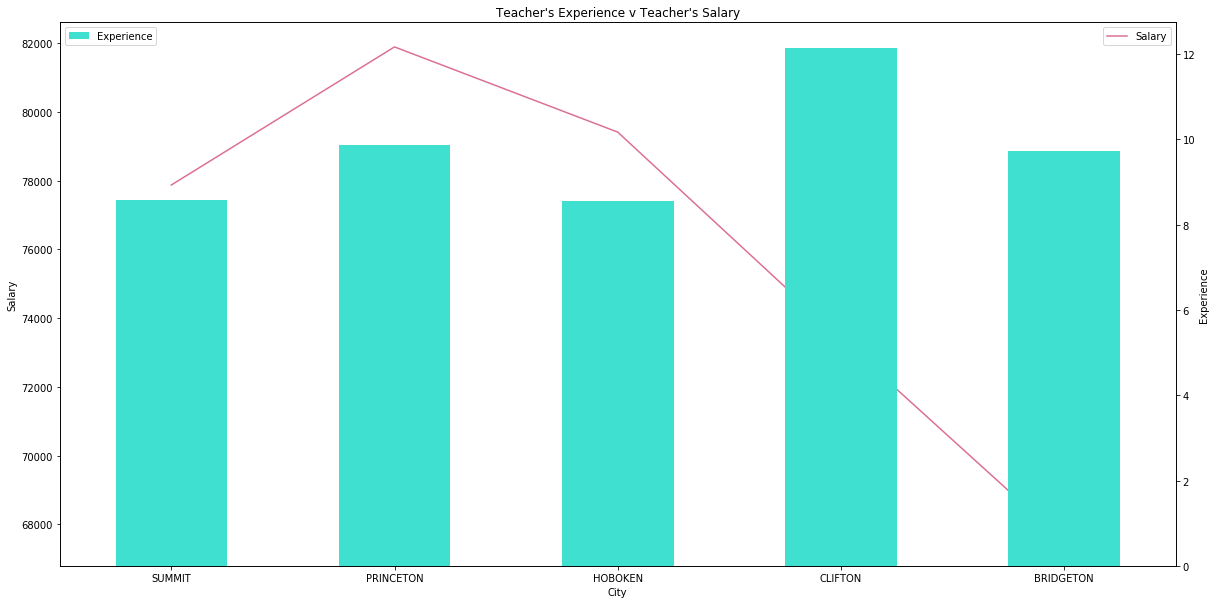

In [55]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111)
ax.set_ylabel("Salary")

ax2 = ax.twinx()
ax2.set_ylabel("Experience")

final_data_mean.Salary.plot(kind="line", ax=ax, color='Palevioletred', legend=True)
final_data_mean.Experience.plot(kind="bar", ax=ax2,color='Turquoise', legend=True)
ax.set_title("Teacher's Experience v Teacher's Salary")
plt.legend(loc="upper left")
#plt.savefig("../graph/gradrate_teachexp_2axis.png")

Text(0.5,1,"Graduation Rate v Teacher's Experience")

<Figure size 432x288 with 0 Axes>

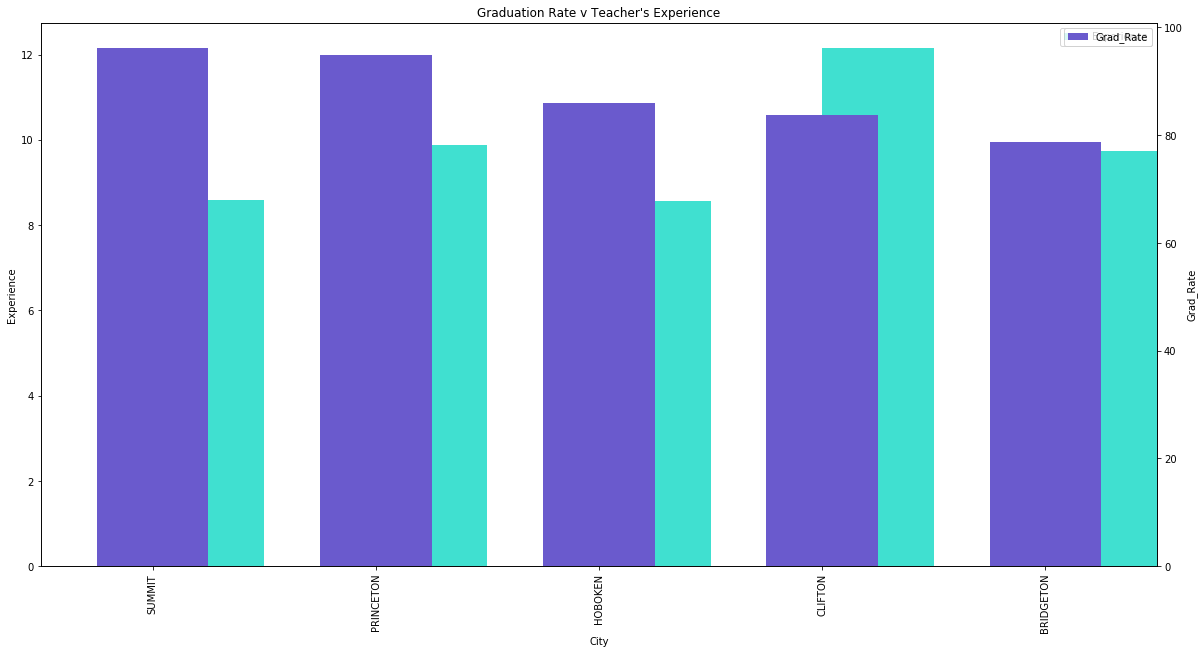

In [56]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))

newax1 = fig.add_subplot(111)
newax2 = newax1.twinx()
newax1.set_ylabel("Experience")
newax2.set_ylabel("Grad_Rate")

d = final_data_mean.plot(
    kind="bar",
    ax=newax1,
    position=0,
    color='Turquoise',
    legend=True,
    y="Experience",
    
)

final_data_mean.plot(
    kind="bar",
    ax=newax2,
    position=.5,
    color='Slateblue',
    legend=True,
    y="Grad_Rate"
)
plt.title("Graduation Rate v Teacher's Experience")

Text(0.5,1,"Graduation Rate v Teacher's Salary")

<Figure size 432x288 with 0 Axes>

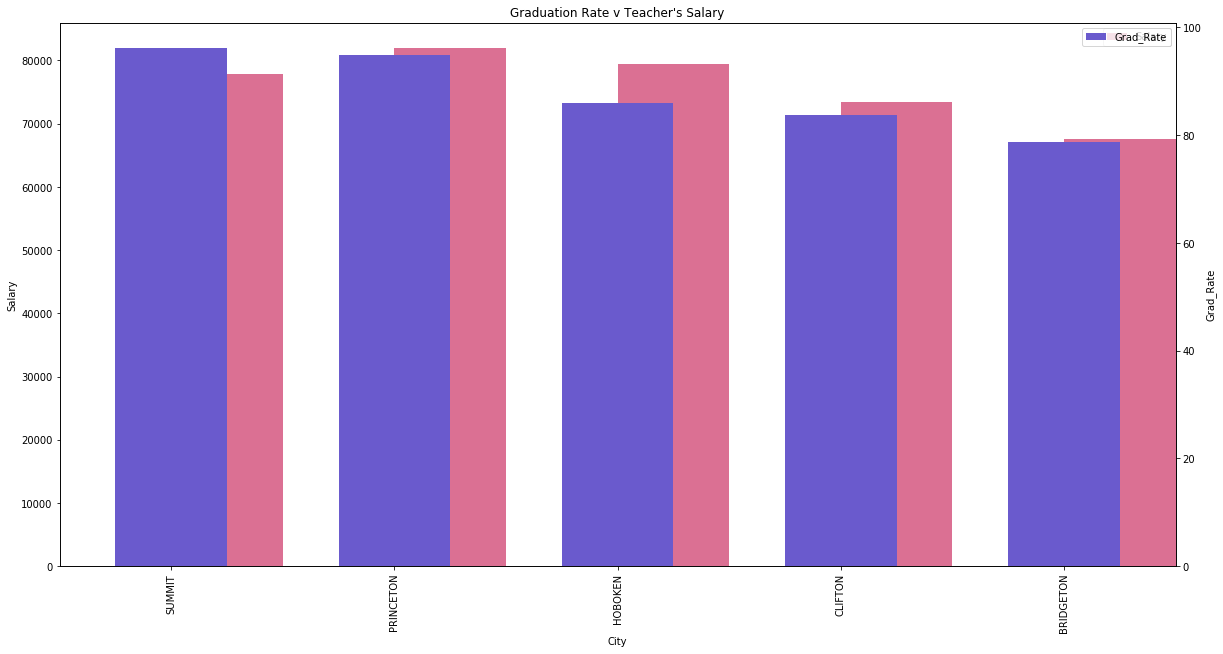

In [57]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))

newax1 = fig.add_subplot(111)
newax2 = newax1.twinx()
newax1.set_ylabel("Salary")
newax2.set_ylabel("Grad_Rate")

d = final_data_mean.plot(
    kind="bar",
    ax=newax1,
    position=0,
    color='Palevioletred',
    legend=True,
    y="Salary",
    
)

final_data_mean.plot(
    kind="bar",
    ax=newax2,
    position=.5,
    color='Slateblue',
    legend=True,
    y="Grad_Rate"
)
plt.title("Graduation Rate v Teacher's Salary")

Text(0.5,1,"Teacher's Salary v Teacher's Experience")

<Figure size 432x288 with 0 Axes>

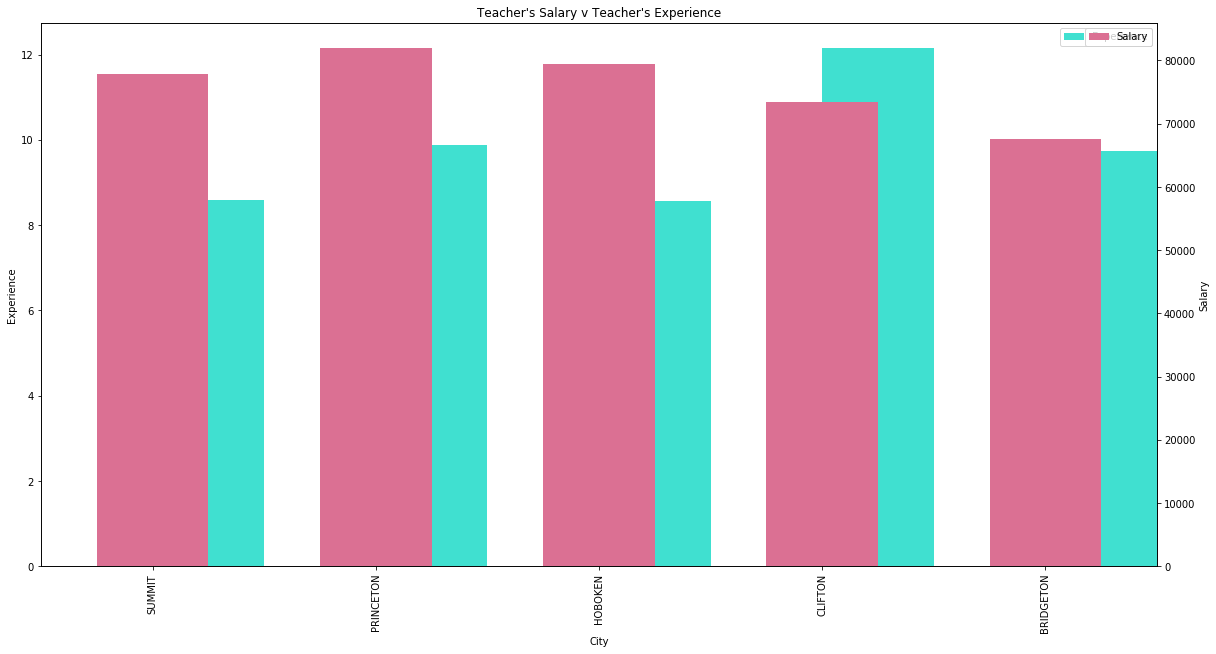

In [58]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 10))

newax1 = fig.add_subplot(111)
newax2 = newax1.twinx()
newax1.set_ylabel("Experience")
newax2.set_ylabel("Salary")

d = final_data_mean.plot(
    kind="bar",
    ax=newax1,
    position=0,
    color='Turquoise',
    legend=True,
    y="Experience",
    
)

final_data_mean.plot(
    kind="bar",
    ax=newax2,
    position=.5,
    color='Palevioletred',
    legend=True,
    y="Salary"
)
plt.title("Teacher's Salary v Teacher's Experience")